In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sqlalchemy.ext.declarative import declarative_base



In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func


In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()


In [5]:
# Create a base class for automapping
Base = automap_base()

In [6]:
# reflect an existing database into a new model

Base.prepare(autoload_with=engine)

# reflect the tables
Base.classes.keys()



['station', 'measurement']

In [7]:
# Save references to each table

Station = Base.classes.station  
Measurement = Base.classes.measurement  

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

Session

sqlalchemy.orm.session.Session

In [9]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

recent_date

('2017-08-23',)

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

twelve_months = dt.date(2017, 8, 23) - dt.timedelta(days=365)

twelve_months


datetime.date(2016, 8, 23)

In [13]:
# Perform a query to retrieve the data and precipitation scores
query_results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-22' ).all()

query_results

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [14]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names

df = pd.DataFrame(query_results, columns=['Date', 'Precipitation'])

# df.rename(columns={'date': 'date', 'prcp': 'Precipitation'})
df.set_index('Date', inplace=True)

print(df)

            Precipitation
Date                     
2016-08-23           0.00
2016-08-24           0.08
2016-08-25           0.08
2016-08-26           0.00
2016-08-27           0.00
...                   ...
2017-08-19           0.09
2017-08-20            NaN
2017-08-21           0.56
2017-08-22           0.50
2017-08-23           0.45

[2230 rows x 1 columns]


In [15]:

# Sort the dataframe by date

df = df.sort_values(by='Date')

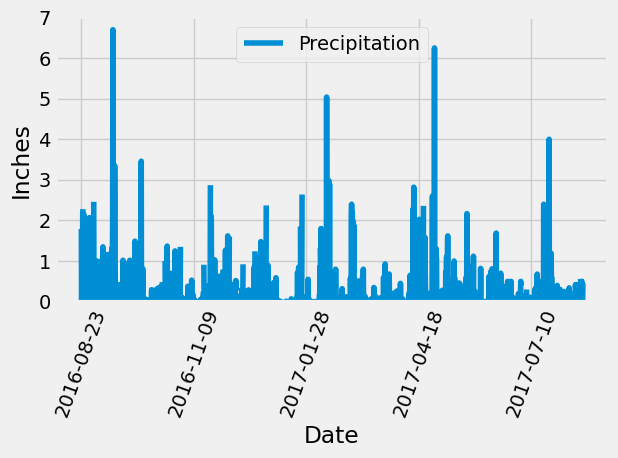

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data 
df.plot()
plt.ylim(0,7)
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout()
plt.show()
plt.show()

In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = df['Precipitation']. describe()

print(summary_stats)

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64


In [18]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Station.station).count()
print(station_count)

9


In [19]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

most_active = session.query(Measurement.station,func.count(Measurement.station)).\
    order_by(func.count(Measurement.station).desc()).\
    group_by(Measurement.station).all() 

# Print results
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
station_id = most_active[0][0]

print(f"station_id: {station_id}, type: {type(station_id)}")

station_id: USC00519281, type: <class 'str'>


In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temperature = session.query(func.min(Measurement.tobs)).\
  filter(Measurement.station == station_id).all()

highest_temperature = session.query(func.max(Measurement.tobs)).\
  filter(Measurement.station == station_id).all()

average_temperature = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station==station_id).all()

print(f" The lowest temperature is : {lowest_temperature}, The highest temperature is : {highest_temperature}, and the average temperature is : {average_temperature}")

 The lowest temperature is : [(54.0,)], The highest temperature is : [(85.0,)], and the average temperature is : [(71.66378066378067,)]


In [25]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_recent_date= session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.station == station_id).\
    order_by(Measurement.date.desc()).first()
station_recent_date

('2017-08-18', 79.0)

In [28]:
twelve_months_station = session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.station == station_id).\
    filter(Measurement.date > '2016-08-17').all()

twelve_months_station

[('2016-08-18', 80.0),
 ('2016-08-19', 79.0),
 ('2016-08-20', 81.0),
 ('2016-08-21', 79.0),
 ('2016-08-22', 78.0),
 ('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-

In [30]:
twelve_months_station_df = pd.DataFrame(twelve_months_station)["tobs"]
twelve_months_station_df 

0      80.0
1      79.0
2      81.0
3      79.0
4      78.0
       ... 
352    77.0
353    77.0
354    76.0
355    76.0
356    79.0
Name: tobs, Length: 357, dtype: float64

(0.0, 70.0)

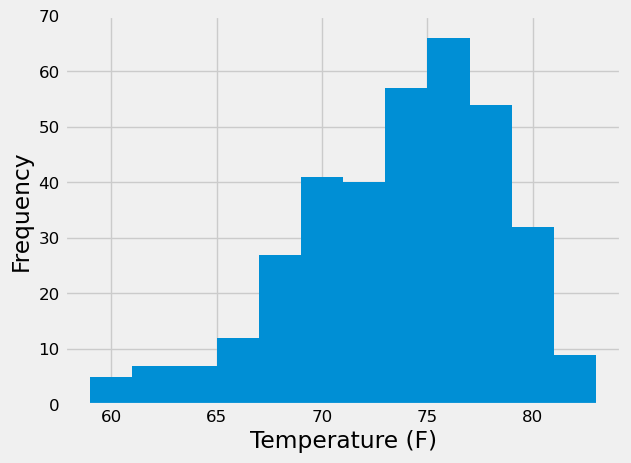

In [31]:
hist = twelve_months_station_df.hist(bins=12) 
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,70)

In [32]:
# Close Session
session.close()